In [2]:
print("hello world")

hello world


In [3]:
import os
print("my path is ", os.getcwd())

my path is  c:\Users\JB\infx497


### Setup 0⃣
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [4]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Chapter 2
Your first task is to use California census data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each
dstrict in California. Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

## Machine Learning Project Checklist
 
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

### 1. Frame the problem and look at the big picture
Model's output, a prediction of district's median housing price, will be ged to another ML system (pipeline) along with other information which will determine whether it is worth investing in the area or not.

Ask yourself, is this a Supervised, Unsupervised, or Reinforcement Learning problem? Is it a calssification task, regression task, or something else? Should you use batch learning, online learning, or something else?

1. Supervised
- Regression: predicting a value
- Classification: Predict a class
2. Unsupervised
- Clustering: Group ungrouped data
- Assocation Rule Mining: Find associations between two or more classes
3. Reinforcement
- Supervised univariate regression task

### 2. Get the Data

In [5]:
#function that fetches housing.tgz data
import os
import tarfile
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#creates a datasets/housing directory in your workspace, downloads the housing.tgz file, and extracts the housing.csv file from it in this directory
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [6]:
#load the data using pandas
import pandas as pd

#returns a pandas DataFrame object containing all the data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

C:\Users\JB\AppData\Local\Temp\ipykernel_27356\1200238656.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
#view top five rows in the dataset using head()
#10 attributes
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
#get a quick description of the data using info()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#only ocean_proximity is an object, but we know it is text since this is loaded from a CSV file
#find out what categories exist and how many districts belong to each category using value_counts()
print(housing["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [10]:
#summary of numerical attributes using describe() to get a feel for the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


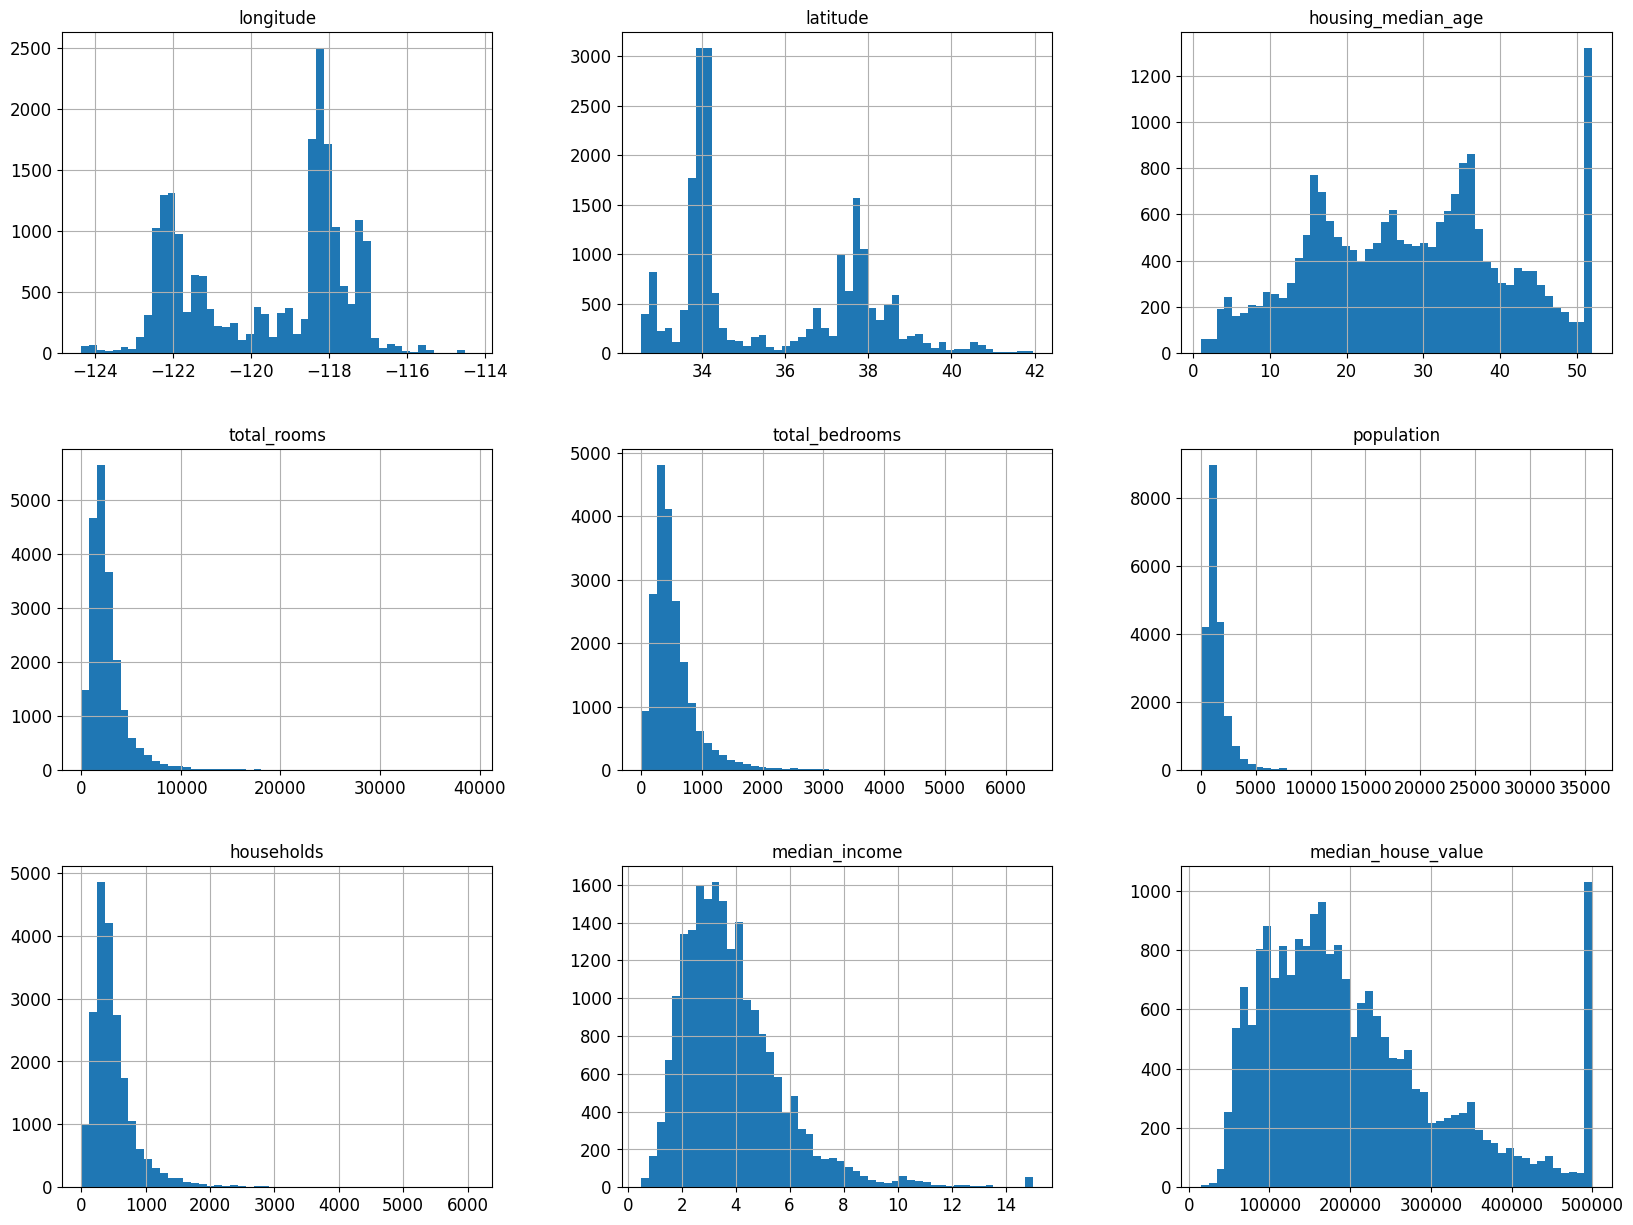

In [11]:
#plot a histogram to get a feel for the data
#plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
#specify which backend Matplotlib, tells Jupyter to set up Matplotlib so it uses Jupyter’s own backend.
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
#optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed
plt.show()

### Create a test set
Pick instances randomly, typically %20 of the testset. Don't look at data too much before setting aside some training data even before choosing an algorithm to avoid your own biases

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
#you can then use your function like this
train_set, test_set = split_train_test(housing, 0.2)
print("train_set: ", len(train_set))
print("test_set: ", len(test_set))

train_set:  16512
test_set:  4128


In [14]:
#This works but will generate a different test set with each run
#compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 
#20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset.
#The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.
from zlib import crc32

def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
#adds an `index` column
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
#adds an 'index' column with sklearn with more features than above
#random_state parameter that allows you to set the random generator seed
#can pass it multiple datasets with an identical number of rows, and it will split them on the same indices 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

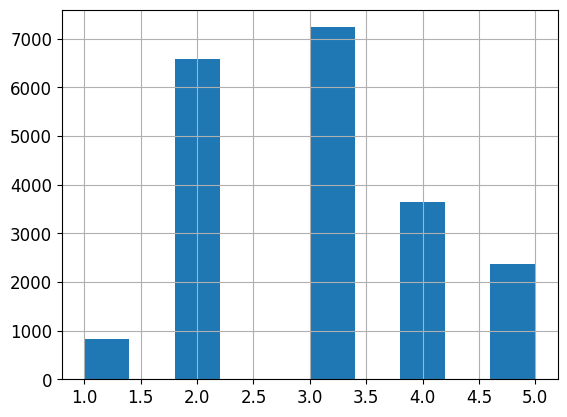

In [17]:
#To reduce sampling bias, we implement strata samplying and ensure our data includes the median income to accurately predict median home prices
#using the pd.cut() function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 
#(i.e., less than $15,000), category 2 from 1.5 to 3, etc
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [18]:
#stratified sampling based on the income category using Scikit-Learn’s StratifiedShuffleSplit class:
from sklearn.model_selection import StratifiedShuffleSplit
#n_splits=Number of re-shuffling & splitting iterations.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]
#look at income category proportions in the test set
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [19]:
#remove the income_cat attribute so the data is back to its original state since sampling is skewed
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights
- Make sure you have put aside your test set and are only exploring the training data

In [20]:
#copy training set to play with so we do not harm the training data we have put aside
housing = strat_train_set.copy()

### Visualize Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

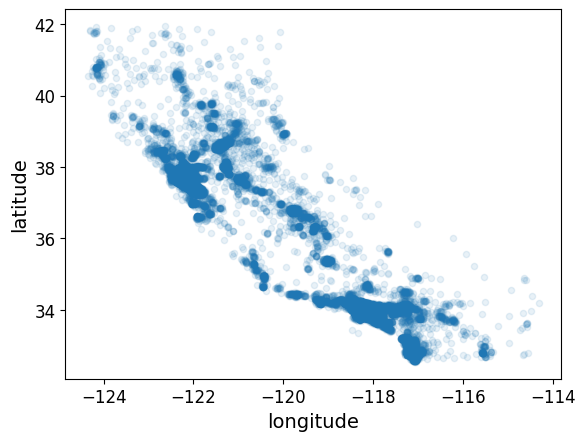

In [21]:
#housing.plot(kind="scatter", x="longitude", y="latitude")
#set alpha option to visualize the places where there is a high density of data points
# the alpha parameter controls the opacity of the points in the plot. The value of alpha ranges from 0 to 1, where 0 means completely transparent (the points are invisible), and 1 means completely opaque
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

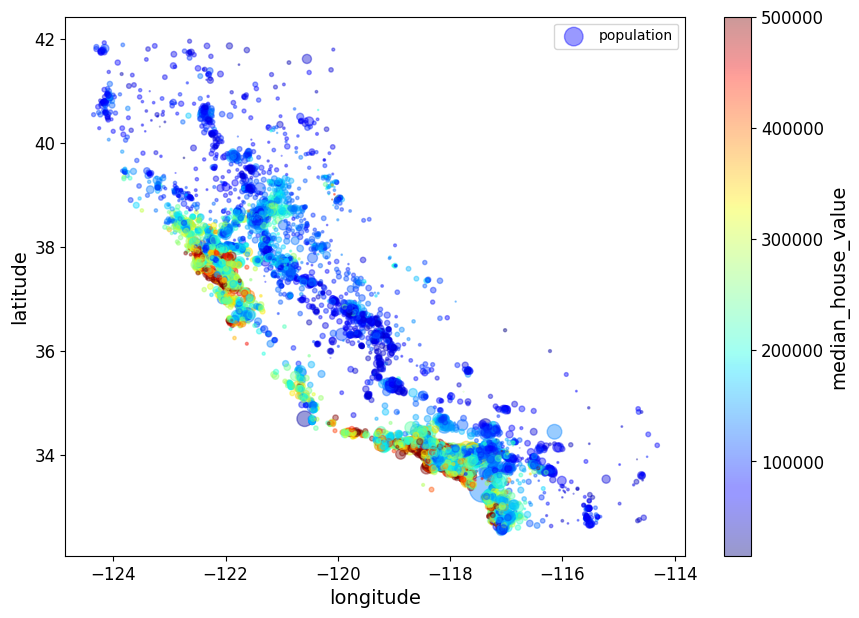

In [22]:
#now look at housing prices
#each radius represents the district's population (s), color represents price (c)
#use predefined  color map (cmap)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [23]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x2c54bdb3c10>)

Saving figure california_housing_prices_plot


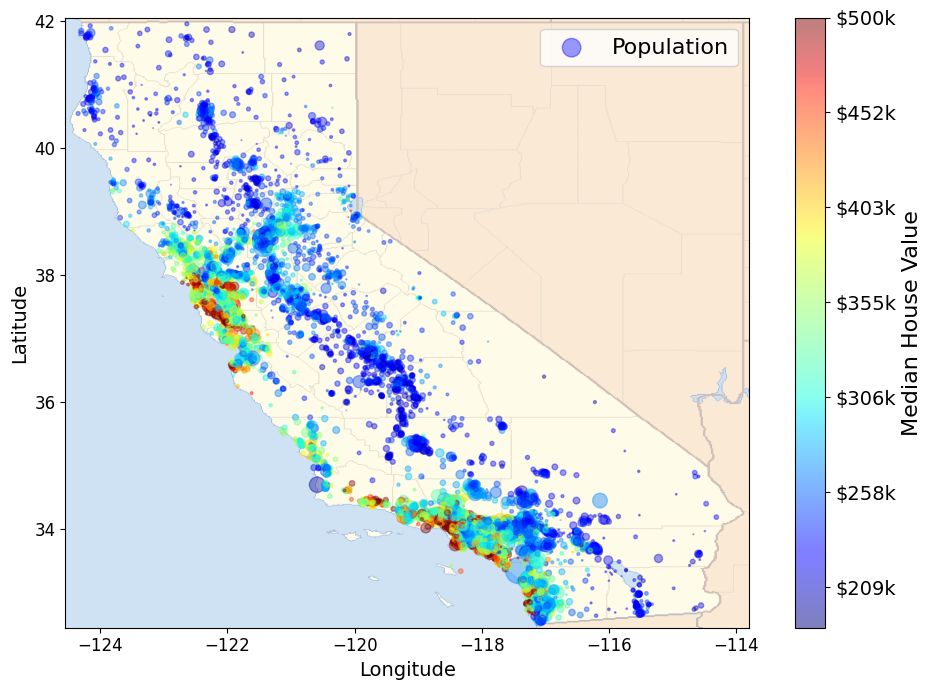

In [24]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

### Looking for Correlations  
between attributes

In [25]:
#compute standard correlation coefficient (Pearson's r) between every pair of attributes using corr()
corr_matrix = housing.corr(numeric_only=True)
#look at how each attribute correlates with median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to 0 mean that there is no
linear correlation. 

Saving figure scatter_matrix_plot


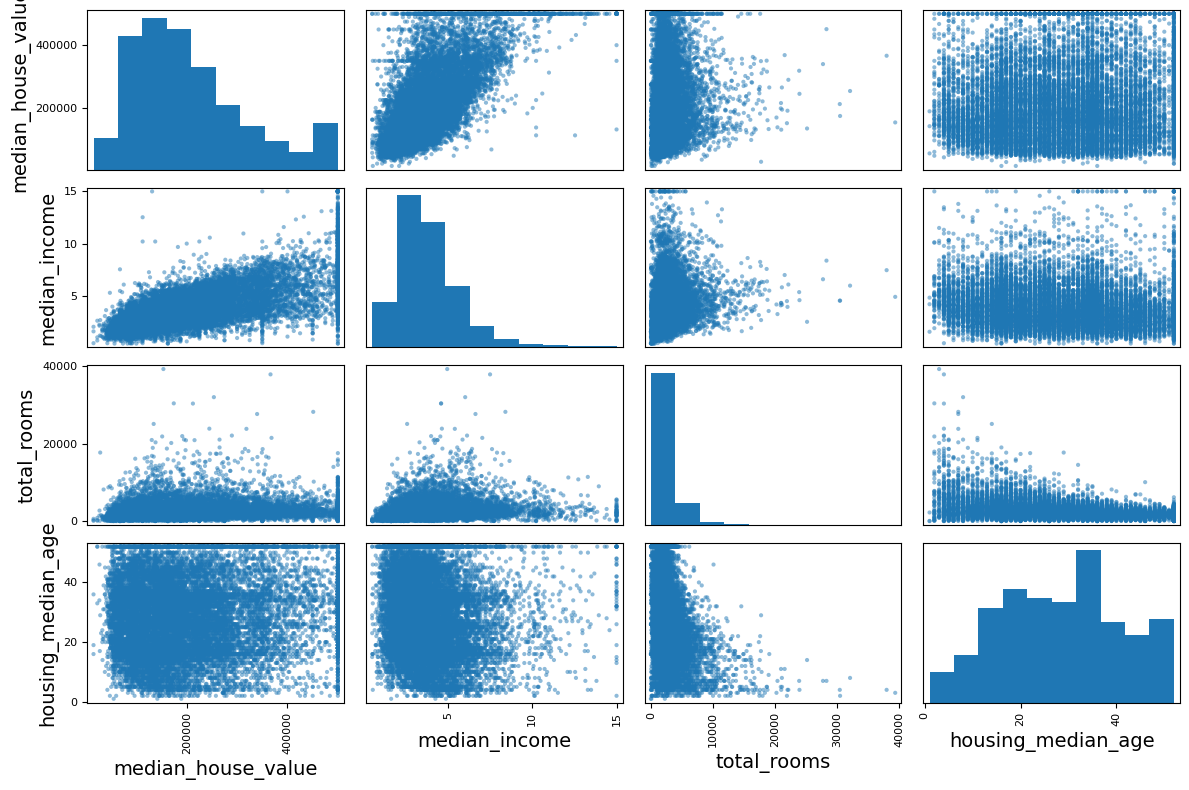

In [26]:
#another way to check for correlation between attributes is scatter_matrix()
#which plots every numerical attribute against every other numerical attribute
#limit to promising attributes!
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

<Axes: xlabel='median_income', ylabel='median_house_value'>

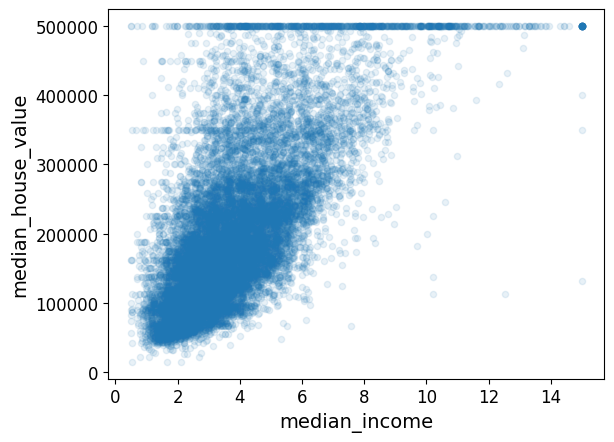

In [27]:
#zoom in on the most promising attribute, median income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000. But this plot reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

### If you want to experiment a little more with attribute combinations:


In [28]:
#combine some attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
#look at the correlation matrix again:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

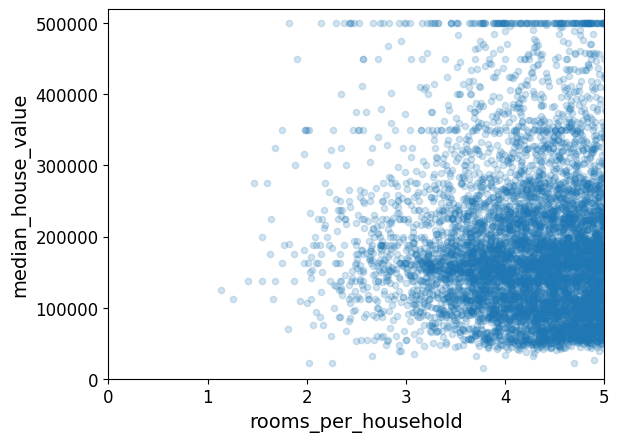

In [29]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

## 4. Prepare the data for Machine Learning Algorithms

In [30]:
#revert to a clean training set
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning
Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. We saw earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).
   
You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:
- housing.dropna(subset=["total_bedrooms"]) # option 1
- housing.drop("total_bedrooms", axis=1) # option 2
- median = housing["total_bedrooms"].median() # option 3
  
housing["total_bedrooms"].fillna(median, inplace=True)

In [31]:
#use SimpleImputer to take care of missing values by replacing each missing value with the median of that attribute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#Since the median can only be computed on numerical attributes create a copy of the data without the text attribute ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
print(imputer.statistics_)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [33]:
#Check that thi is the same as manually computing the median of each attribute
#commenting out since I get error: TypeError: 'Categorical' with dtype category does not support reduction 'median'
#housing_num.median().values
#using this instead
housing_num_only = housing_num.select_dtypes(include=[np.number])
housing_num_only.median().values
#I get the same values I should except on the last one which is nly a little off


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [34]:
#now use the trained imputer to transform the training set by replacing missing values with learned medians
X = imputer.transform(housing_num)
#transofrm play NumPy array to DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Handling Text and Categorical Attributes
Only one here is the ocean_proximity attribute

In [35]:
#Handling Text Attributes
housing_cat = housing[["ocean_proximity"]]
#look at first ten instances
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [36]:
#ML Algorithms prefer to work with numbers, so convert text to numbers
#Convert text to numbers for Machine Learning Algorithms using OrdinalEncoder class
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [37]:
#get a list of 1D list of categories for each categorical attribute using categories_ instance variable
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
# ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g.,
#for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the ocean_proximity column
#(for example, categories 0 and 4are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary
#attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the cate‐
#gory is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the 
#others will be 0 (cold). The new attributes are sometimes called dummy attributes. Uses oneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
#or to convert to a dense NumPy array
#housing_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers
Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need to do is create a class and implement three methods: fit()
(returning self), transform(), and fit_transform().

You can get the last one for free by simply adding TransformerMixin as a base class. If you add BaseEstimator as a base class (and avoid *args and **kargs in your constructor), you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.


In [39]:
#Example: this is a small transformer class that adds the combined attributes discussed earlier;
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
     self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
     return self # nothing else to do
 def transform(self, X):
     rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
     population_per_household = X[:, population_ix] / X[:, households_ix]
     if self.add_bedrooms_per_room:
         bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
         return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
     else:
        return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required. There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

1. Min-max Scaling
  - Min-max scaling (normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.
2. Standardization
- first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers.

## Tranformation Pipelines
Data transformation steps that need to be executed in the right order.


In [40]:
#there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. 
#Here is a small pipeline for the numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
#All but the last estimator must be transformers (i.e., they must have a fit_transform() method).

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the fit() method.


So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. Let’s Scikit-Learn's ColumnTransformerto apply all the transformations to the housing data:

In [41]:
#apply all the transformations to the housing data
#import ColumnTransformer
from sklearn.compose import ColumnTransformer
#get a list of categorical column names
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#construct  ColumnTransformer
#constructor requires a list of tuples, where each tuple contains a name,22 a transformer, and a list of names (or indices) of columns that the transformer should be applied to.
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
# apply this ColumnTransformer to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis
housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model
At last! You framed the problem, you got the data and explored it, you sampled a training set and a test set, and you wrote transformation pipelines to clean up and prepare your data for Machine Learning algorithms automatically. You are now ready to select and train a Machine Learning model.

### Training and Evaluating on the Training Set

First try a Linear Regression Model
- Supervised Learning Algorithm
- Used to Predict Values
- Simplest and most commonly used
- typically use a cost function that measures the distance between the linear model’s predictions and the training examples; the objective is to minimize this distance.

In [42]:
#first train a Linear Regression model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Now we have a working Linear Regression model. Let's try it on a few instances from the training set:

In [43]:
#try the Linear Regression model out on a few instances from training set
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error() function:


In [44]:
#Measure this regression model’s RMSE on the whole training set using mean_squared_error() function
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

Most districts’ median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. 
This is an example of a model underfitting the training data. So, features do not provide enough info to make good predictions.

Let's train DecisionTreeRegressor, which is a more powerful model capable of finding nonlinear relationships in data.

In [45]:
#train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [46]:
#Now that the model is trained, let’s evaluate it on the training set:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Model too perfect (0.0 means no error at all), we may have overfit the model now.

### Better Evaluation Using Cross-Validation
Evaluate the model using Cross-Validation. This code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [47]:
#use K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it
#trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 
#The result is an array containing the 10 evaluation scores:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
#print
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [73012.28292991 69618.78447036 68449.06282324 71688.03721425
 69161.72638305 78485.3771413  70404.68953288 72118.71662658
 69080.7539943  69408.62784131]
Mean: 71142.80589571837
Standard deviation: 2827.8223465712254


The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model. Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 71,407, generally ±2,439.

Compute the same scores for the Linear Regression model just to be sure:

In [48]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


In [49]:
#try RandomForestRegressor model
#works by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many
#other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22413.454658589766

Wow, this is much better: Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

## Fine Tune Your Model
Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.
1. Grid Search (GridSearchSV): 
- To find best hyperparameters.
- With GridSearchSV all you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.
2. Randomized Search
- Better for when the hyperparameter space is large
- RandomizedSearchCV works much like gridSearchSV, but instead of trying out all possible combinations it evaluates a given number of random combos by selecting a random value with each hyperparameter at every iteration
3. Ensemble Methods
- combine models that perform best


### Grid Search

In [50]:
#the following code searches for the best combination of hyperparameter values for the RandomForestRegressor:
from sklearn.model_selection import GridSearchCV
#first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict then try all 2 × 3 = 6 combinations of hyperparameter 
#values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter)
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
#The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times (since we are using five-fold 
#cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training

#Since 8 and 30 are the maximum values that were evaluated, you should probably try searching again with higher values; the score may continue to improve.


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Get the best combination of parameters:

In [51]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

You can also get the best estimator directly:

In [52]:
grid_search.best_estimator_


RandomForestRegressor(max_features=6, n_estimators=30)

In [53]:
#??
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
 max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
 min_samples_leaf=1,
 min_weight_fraction_leaf=0.0,
 n_estimators=30, n_jobs=None, oob_score=False, random_state=None,
 verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features=8, n_estimators=30)

Evaluation scores are also available:

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)
  
#so RMSe score for best estimators is 50,800 which is better than what we got earlier. Model is now fine tuned.


63430.23164648227 {'max_features': 2, 'n_estimators': 3}
55501.37891148437 {'max_features': 2, 'n_estimators': 10}
52668.26859604157 {'max_features': 2, 'n_estimators': 30}
60234.431368894475 {'max_features': 4, 'n_estimators': 3}
52915.62192770302 {'max_features': 4, 'n_estimators': 10}
50584.16102689868 {'max_features': 4, 'n_estimators': 30}
59202.30985683446 {'max_features': 6, 'n_estimators': 3}
52153.04150973856 {'max_features': 6, 'n_estimators': 10}
50153.81195583848 {'max_features': 6, 'n_estimators': 30}
58966.41523169503 {'max_features': 8, 'n_estimators': 3}
51957.01182613392 {'max_features': 8, 'n_estimators': 10}
50333.70835357932 {'max_features': 8, 'n_estimators': 30}
61773.7531017966 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54544.63542242482 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59120.82084582516 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52406.39429388034 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

### Analyze the Best Models and Their Errors


You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [55]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.09081660e-02, 7.70354843e-02, 4.27296977e-02, 1.90190165e-02,
       1.68603439e-02, 1.95505778e-02, 1.61720323e-02, 2.96042024e-01,
       7.18010473e-02, 1.07836908e-01, 8.24892321e-02, 1.65257885e-02,
       1.44740573e-01, 1.02113970e-04, 2.60393806e-03, 5.58305689e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [56]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2960420240741202, 'median_income'),
 (0.14474057294880005, 'INLAND'),
 (0.10783690761119984, 'pop_per_hhold'),
 (0.08248923212510552, 'bedrooms_per_room'),
 (0.08090816600889442, 'longitude'),
 (0.07703548428628108, 'latitude'),
 (0.071801047270604, 'rooms_per_hhold'),
 (0.04272969772463538, 'housing_median_age'),
 (0.019550577810526597, 'population'),
 (0.0190190164898573, 'total_rooms'),
 (0.01686034390525836, 'total_bedrooms'),
 (0.01652578852944214, '<1H OCEAN'),
 (0.016172032289337245, 'households'),
 (0.005583056893258331, 'NEAR OCEAN'),
 (0.0026039380624042754, 'NEAR BAY'),
 (0.00010211397027530726, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others).
You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).

### Evaluate Your System on the Test Set
Just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform()—you do not want to fit the test set!), and evaluate the final model on the test set:

In [57]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval():

In [58]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

#If you did a lot of hyperparameter tuning, the performance will usually be slightly worse than what you measured using cross-validation (because your system ends up fine-tuned to 
#perform well on the validation data and will likely not perform as well  on unknown datasets).

array([46105.8235723, 50027.401599 ])


# Chapter 2, Exercise 1
Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the C hyperparameter) or `kernel="rbf"` 
(with various values for the `C` and `gamma` hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [59]:
#train SVC model
from sklearn.svm import SVC
#Cfloat, default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
sup_vec = SVC()
#(X, y[, sample_weight]) Fit the SVM model according to the given training data.
sup_vec.fit(housing_prepared, housing_labels)

SVC()

The C value balances the decision boundary's margin width and the classification error on the training data. Higher C values will minimize classification error. This can lead to a model that fits the training data very well, including outliers and noise, potentially causing overfitting. Lower C values encourages the model to find a decision boundary with a wider margin, even if that boundary misclassifies more points. This may cause a simpler model that may generalize better on unseen data, but at the risk of underfitting.

In [60]:
#(X) Perform classification on samples in X.
housing_predictions = sup_vec.predict(housing_prepared)
#(y_true, y_pred) y_true:array-like of shape (n_samples,) or (n_samples, n_outputs) Ground truth (correct) target values.
#y_pred: array-like of shape (n_samples,) or (n_samples, n_outputs)Estimated target values.
svc_mse = mean_squared_error(housing_labels, housing_predictions)
svc_rmse = np.sqrt(svc_mse)
svc_rmse #182221.07908782372
#took 58 minutes

182221.07908782372

This is 182,221 units away from the actual values in the dataset, so a significant deviation in predicted house prices from actual house prices.

RMSE is a standard way to measure the error of a model in predicting quantitative data. It quantifies how much the predicted values (in this case, housing_predictions) deviate from the actual values (housing_labels), providing a comprehensive measure of prediction accuracy.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC #COMMENT OUT

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} #SCALE AND AUTO?
#initialize GridSearchCV
grid_search = GridSearchCV(sup_vec, param_grid, cv=5)
#Fit GridSeachCV to training data
grid_search.fit(housing_prepared, housing_labels)
print("Best parameters:", grid_search.best_params_)

C:\Users\JB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


**How does the best SVR Predictor perform?**

# Chapter 2, Exercise 2
Try replacing GridSearchCV with RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 'scale', 'auto']} 
#initialize RandomizedSearchCV
rand_search = RandomizedSearchCV(sup_vec, param_grid, cv=5)
#Fit RandomizedSearchCV to training data
rand_search.fit(housing_prepared, housing_labels)
print("Best parameters:", rand_search.best_params_)

# Chapter 2, Exercise 3
Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
#Train a model to determine what features are important. RandomForest gives this.

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
#Custom transformer
#use feature importances to select top N features
from sklearn.base import BaseEstimator, TransformerMixin

class TopFeatures(BaseEstimator, TransformerMixin):
  def __init__(self, feature_importances, topNFeatures):
    self.feature_importances = feature_importances
    self.topNFeatures = topNFeatures
    
def fit(self, housing_prepared, y=None):
  self.feature_indices_ = self.feature_importances.argsort()[-self.topNFeatures:]
  return self

def transform(self, housing_prepared):
  return housing_prepared[:self.feature_indices_]

In [ ]:
#Transformer --> Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#get feature instances from trained RandomForestRegressor above
feature_importances = forest_reg.feature_importances_

topNFeatures = 5

pipe = Pipeline([('preparation', full_pipeline()), ('feature_selection', TopFeatures(feature_importances, topNFeatures))])

#fit and transform data
housing_prepared_topNFeatures = pipe.fit_transform(housing_prepared)

# Chapter 2, Exercise 4
Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:
single_pipe = Pipeline([('preparation', full_pipeline()), 
('feature_selection', TopFeatures(feature_importances, topNFeatures))
('sup_vec', SVR(**rand_search.best_params_))
])

single_pipe.fit(housing_prepared, housing_labels)

# Chapter 2, Exercise 5
Automatically explore some preparation options using GridSearchCV.